# Vectors, Matrices, and Arrays in NumPy

NumPy is a foundational tool of the Python machine learning stack. NumPy allows for efficient operations on the data structures often used in machine learning: vectors, matrices, and tensors. While NumPy isn’t the focus of this book, it will show up frequently in the following chapters. This chapter covers the most common NumPy operations we’re likely to run into while working on machine learning workflows.

## Creating a Vector

In [1]:
# Load library
import numpy as np

In [5]:
# Create a vector as a row
vector_row = np.array([1, 2, 3])

print(vector_row)

[1 2 3]


In [6]:
# Create a vector as a column
vector_column = np.array([[1],
                          [2],
                          [3]])

print(vector_column)

[[1]
 [2]
 [3]]


NumPy’s main data structure is the multidimensional array. A vector is just an array with a single dimension. To create a vector, we simply create a one-dimensional array. Just like vectors, these arrays can be represented horizontally (i.e., rows) or vertically (i.e., columns).

## Creating a Matrix

In [7]:
# Load library
import numpy as np

In [8]:
# Create a matrix
matrix = np.array([[1, 2],
                   [1, 2],
                   [1, 2]])

print(matrix)

[[1 2]
 [1 2]
 [1 2]]


To create a matrix we can use a NumPy two-dimensional array. In our solution, the matrix contains three rows and two columns (a column of 1s and a column of 2s).

NumPy actually has a dedicated matrix data structure:

In [9]:
matrix_object = np.mat([[1, 2],
                        [1, 2],
                        [1, 2]])

print(matrix_object)

[[1 2]
 [1 2]
 [1 2]]


However, the matrix data structure is not recommended for two reasons. First, arrays are the de facto standard data structure of NumPy. Second, the vast majority of NumPy operations return arrays, not matrix objects.

## Creating a Sparse Matrix

In [ ]:
# !pip install scipy

In [12]:
# Load library
import numpy as np
from scipy import sparse

In [13]:
# Create a matrix
matrix = np.array([[0, 0],
                   [0, 1],
                   [3, 0]])

print(matrix)

[[0 0]
 [0 1]
 [3 0]]


A frequent situation in machine learning is having a huge amount of data; however, most of the elements in the data are zeros. For example, imagine a matrix where the columns are every movie on Netflix, the rows are every Netflix user, and the values are how many times a user has watched that particular movie. This matrix would have tens of thousands of columns and millions of rows! However, since most users do not watch most movies, the vast majority of elements would be zero.

A sparse matrix is a matrix in which most elements are 0. Sparse matrices store only nonzero elements and assume all other values will be zero, leading to significant computational savings. In our solution, we created a NumPy array with two nonzero values, then converted it into a sparse matrix. If we view the sparse matrix we can see that only the nonzero values are stored:

In [14]:
# Create compressed sparse row (CSR) matrix
matrix_sparse = sparse.csr_matrix(matrix)

print(matrix_sparse)

  (1, 1)	1
  (2, 0)	3


There are a number of types of sparse matrices. However, in compressed sparse row (CSR) matrices, (1, 1) and (2, 0) represent the (zero-indexed) indices of the nonzero values 1 and 3, respectively. For example, the element 1 is in the second row and second column. We can see the advantage of sparse matrices if we create a much larger matrix with many more zero elements and then compare this larger matrix with our original sparse matrix:

In [16]:
# Create larger matrix
matrix_large = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                         [3, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

print(matrix_large)

[[0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0]]


In [19]:
# Create compressed sparse row (CSR) matrix
matrix_large_sparse = sparse.csr_matrix(matrix_large)
# View original sparse matrix
print(matrix_sparse)

print('\n')

# View larger sparse matrix
print(matrix_large_sparse)

  (1, 1)	1
  (2, 0)	3


  (1, 1)	1
  (2, 0)	3


As we can see, despite the fact that we added many more zero elements in the larger matrix, its sparse representation is exactly the same as our original sparse matrix. That is, the addition of zero elements did not change the size of the sparse matrix.

As mentioned, there are many different types of sparse matrices, such as compressed sparse column, list of lists, and dictionary of keys. While an explanation of the different types and their implications is outside the scope of this book, it is worth noting that while there is no “best” sparse matrix type, there are meaningful differences among them, and we should be conscious about why we are choosing one type over another.

## Preallocating NumPy Arrays

In [1]:
# Load library
import numpy as np

In [7]:
# Generate a vector of shape (1,5) containing all zeros
vector = np.zeros(shape=5)

print(vector)

[0. 0. 0. 0. 0.]


In [9]:
# Generate a matrix of shape (3,3) containing all ones
matrix = np.full(shape=(3,3), fill_value=1)

print(matrix)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


Generating arrays prefilled with data is useful for a number of purposes, such as making code more performant or using synthetic data to test algorithms. In many programming languages, preallocating an array of default values (such as 0s) is considered common practice.

## Selecting Elements

In [ ]:
# Load library
import numpy as np

In [13]:
# Create row vector
vector = np.array([1, 2, 3, 4, 5, 6])

# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Select third element of vector
print(vector[2])

print('\n')

# Select second row, second column
print(matrix[1,1])

3


5


Like most things in Python, NumPy arrays are zero-indexed, meaning that the index of the first element is 0, not 1. With that caveat, NumPy offers a wide variety of methods for selecting (i.e., indexing and slicing) elements or groups of elements in arrays:

In [42]:
# Select all elements of a vector
vector[:]

array([1, 2, 3, 4, 5, 6])

In [43]:
# Select everything up to and including the third element
vector[:3]

array([1, 2, 3])

In [44]:
# Select everything after the third element
vector[3:]

array([4, 5, 6])

In [45]:
# Select the last element
vector[-1]

6

In [46]:
# Reverse the vector
vector[::-1]

array([6, 5, 4, 3, 2, 1])

In [47]:
# Select the first two rows and all columns of a matrix
matrix[:2,:]

array([[1, 2, 3],
       [4, 5, 6]])

In [48]:
# Select all rows and the second column
matrix[:,1:2]

array([[ 2],
       [ 5],
       [ 8],
       [11]])

## Describing a Matrix

In [14]:
# Load library
import numpy as np

In [15]:
# Create matrix
matrix = np.array([[1, 2, 3, 4],
                   [5, 6, 7, 8],
                   [9, 10, 11, 12]])

In [16]:
# View number of rows and columns
matrix.shape

(3, 4)

In [17]:
# View number of elements (rows * columns)
matrix.size

12

In [18]:
# View number of dimensions
matrix.ndim

2

This might seem basic (and it is); however, time and again it will be valuable to check the shape and size of an array both for further calculations and simply as a gut check after an operation.

## Applying Functions over Each Element

In [19]:
# Load library
import numpy as np

In [20]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

In [21]:
# Create function that adds 100 to something
add_100 = lambda i: i + 100

In [22]:
# Create vectorized function
vectorized_add_100 = np.vectorize(add_100)

In [23]:
# Apply function to all elements in matrix
vectorized_add_100(matrix)

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109]])

The NumPy vectorize method converts a function into a function that can apply to all elements in an array or slice of an array. It’s worth noting that vectorize is essentially a for loop over the elements and does not increase performance. Furthermore, NumPy arrays allow us to perform operations between arrays even if their dimensions are not the same (a process called broadcasting). For example, we can create a much simpler version of our solution using broadcasting:

In [49]:
# Add 100 to all elements
matrix + 100

array([[101, 102, 103],
       [104, 105, 106],
       [107, 108, 109],
       [110, 111, 112]])

Broadcasting does not work for all shapes and situations, but it is a common way of applying simple operations over all elements of a NumPy array.

## Finding the Maximum and Minimum Values

In [24]:
# Load library
import numpy as np

In [25]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

In [26]:
# Return maximum element
np.max(matrix)

9

In [27]:
# Return minimum element
np.min(matrix)

1

Often we want to know the maximum and minimum value in an array or subset of an array. This can be accomplished with the max and min methods. Using the axis parameter, we can also apply the operation along a certain axis:

In [28]:
# Find maximum element in each column
np.max(matrix, axis=0)

array([7, 8, 9])

In [29]:
# Find maximum element in each row
np.max(matrix, axis=1)

array([3, 6, 9])

## Calculating the Average, Variance, and Standard Deviation

In [30]:
# Load library
import numpy as np

In [31]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

In [32]:
# Return mean
np.mean(matrix)

5.0

In [33]:
# Return variance
np.var(matrix)

6.666666666666667

In [34]:
# Return standard deviation
np.std(matrix)

2.581988897471611

Just like with max and min, we can easily get descriptive statistics about the whole matrix or do calculations along a single axis:

In [35]:
# Find the mean value in each column
np.mean(matrix, axis=0)

array([4., 5., 6.])

## Reshaping Arrays

In [36]:
# Load library
import numpy as np


In [37]:
# Create 4x3 matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])

In [38]:
# Reshape matrix into 2x6 matrix
matrix.reshape(2, 6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

reshape allows us to restructure an array so that we maintain the same data but organize it as a different number of rows and columns. The only requirement is that the shape of the original and new matrix contain the same number of elements (i.e., are the same size). We can see the size of a matrix using size:

In [39]:
matrix.size

12

One useful argument in reshape is -1, which effectively means “as many as needed,” so reshape(1, -1) means one row and as many columns as needed:

In [40]:
matrix.reshape(1, -1)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]])

Finally, if we provide one integer, reshape will return a one-dimensional array of that length:

In [41]:
matrix.reshape(12)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## Transposing a Vector or Matrix

In [50]:
# Load library
import numpy as np

In [51]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

In [52]:
# Transpose matrix
matrix.T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

Transposing is a common operation in linear algebra where the column and row indices of each element are swapped. A nuanced point typically overlooked outside of a linear algebra class is that, technically, a vector can’t be transposed because it’s just a collection of values:

In [53]:
# Transpose vector
np.array([1, 2, 3, 4, 5, 6]).T

array([1, 2, 3, 4, 5, 6])

However, it is common to refer to transposing a vector as converting a row vector to a column vector (notice the second pair of brackets) or vice versa:

In [54]:
# Transpose row vector
np.array([[1, 2, 3, 4, 5, 6]]).T

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

## Flattening a Matrix

In [55]:
# Load library
import numpy as np

In [56]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

In [57]:
# Flatten matrix
matrix.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

flatten is a simple method to transform a matrix into a one-dimensional array. Alternatively, we can use reshape to create a row vector:

In [58]:
matrix.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

Another common way to flatten arrays is the ravel method. Unlike flatten, which returns a copy of the original array, ravel operates on the original object itself and is therefore slightly faster. It also lets us flatten lists of arrays, which we can’t do with the flatten method. This operation is useful for flattening very large arrays and speeding up code:

In [59]:
# Create one matrix
matrix_a = np.array([[1, 2],
                     [3, 4]])

# Create a second matrix
matrix_b = np.array([[5, 6],
                     [7, 8]])

In [60]:
# Create a list of matrices
matrix_list = [matrix_a, matrix_b]

In [62]:
# Flatten the entire list of matrices
np.ravel(matrix_list)

array([1, 2, 3, 4, 5, 6, 7, 8])

## Finding the Rank of a Matrix

In [63]:
# Load library
import numpy as np

In [64]:
# Create matrix
matrix = np.array([[1, 1, 1],
                   [1, 1, 10],
                   [1, 1, 15]])

In [65]:
# Return matrix rank
np.linalg.matrix_rank(matrix)

2

The rank of a matrix is the dimensions of the vector space spanned by its columns or rows. Finding the rank of a matrix is easy in NumPy thanks to matrix_rank.

## Getting the Diagonal of a Matrix

In [66]:
# Load library
import numpy as np

In [67]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

In [68]:
# Return diagonal elements
matrix.diagonal()

array([1, 4, 9])

NumPy makes getting the diagonal elements of a matrix easy with diagonal. It is also possible to get a diagonal off the main diagonal by using the offset parameter:

In [69]:
# Return diagonal one above the main diagonal
matrix.diagonal(offset=1)

array([2, 6])

In [70]:
# Return diagonal one below the main diagonal
matrix.diagonal(offset=-1)

array([2, 8])

## Calculating the Trace of a Matrix

In [ ]:
# Load library
import numpy as np

In [71]:
# Create matrix
matrix = np.array([[1, 2, 3],
                   [2, 4, 6],
                   [3, 8, 9]])

In [72]:
# Return trace
matrix.trace()

14

The trace of a matrix is the sum of the diagonal elements and is often used under the hood in machine learning methods. Given a NumPy multidimensional array, we can calculate the trace using trace. Alternatively, we can return the diagonal of a matrix and calculate its sum:

In [73]:
# Return diagonal and sum elements
sum(matrix.diagonal())

14

## Calcualting the Dot Products

In [74]:
# Load library
import numpy as np

In [75]:
# Create two vectors
vector_a = np.array([1,2,3])

In [76]:
vector_b = np.array([4,5,6])

In [77]:
# Calculate dot product
np.dot(vector_a, vector_b)

32

The dot product of two vectors,  and , is defined as:
n
E aibi
i=1 

where 
 is the th element of vector , and 
 is the th element of vector . We can use NumPy’s dot function to calculate the dot product. Alternatively, in Python 3.5+ we can use the new @ operator:

In [78]:
# Calculate dot product
vector_a @ vector_b

32

## Adding and Subtracting Matrices

In [79]:
# Load library
import numpy as np

In [80]:

# Create matrix
matrix_a = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 2]])

In [81]:
# Create matrix
matrix_b = np.array([[1, 3, 1],
                     [1, 3, 1],
                     [1, 3, 8]])

In [82]:
# Add two matrices
np.add(matrix_a, matrix_b)

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

In [83]:
# Subtract two matrices
np.subtract(matrix_a, matrix_b)

array([[ 0, -2,  0],
       [ 0, -2,  0],
       [ 0, -2, -6]])

Alternatively, we can simply use the + and – operators:

In [84]:
# Add two matrices
matrix_a + matrix_b

array([[ 2,  4,  2],
       [ 2,  4,  2],
       [ 2,  4, 10]])

## Multiplying Matrices

In [85]:
# Load library
import numpy as np

In [86]:
# Create matrix
matrix_a = np.array([[1, 1],
                     [1, 2]])

In [87]:
# Create matrix
matrix_b = np.array([[1, 3],
                     [1, 2]])

In [88]:
# Multiply two matrices
np.dot(matrix_a, matrix_b)

array([[2, 5],
       [3, 7]])

Alternatively, in Python 3.5+ we can use the @ operator:

In [89]:
# Multiply two matrices
matrix_a @ matrix_b

array([[2, 5],
       [3, 7]])

If we want to do element-wise multiplication, we can use the * operator:

In [90]:
# Multiply two matrices element-wise
matrix_a * matrix_b

array([[1, 3],
       [1, 4]])

## Inverting a Matrix

In [91]:
# Load library
import numpy as np

In [92]:
# Create matrix
matrix = np.array([[1, 4],
                   [2, 5]])

In [93]:
# Calculate inverse of matrix
np.linalg.inv(matrix)

array([[-1.66666667,  1.33333333],
       [ 0.66666667, -0.33333333]])

The inverse of a square matrix, A, is a second matrix, A–1, such that:

where I is the identity matrix. In NumPy we can use linalg.inv to calculate A–1 if it exists. To see this in action, we can multiply a matrix by its inverse, and the result is the identity matrix:

In [94]:
# Multiply matrix and its inverse
matrix @ np.linalg.inv(matrix)

array([[1.00000000e+00, 0.00000000e+00],
       [1.11022302e-16, 1.00000000e+00]])

## Generating Random Values

In [95]:
# Load library
import numpy as np

In [96]:
# Set seed
np.random.seed(0)

In [97]:
# Generate three random floats between 0.0 and 1.0
np.random.random(3)

array([0.5488135 , 0.71518937, 0.60276338])

NumPy offers a wide variety of means to generate random numbers—many more than can be covered here. In our solution we generated floats; however, it is also common to generate integers:

In [98]:
# Generate three random integers between 0 and 10
np.random.randint(0, 11, 3)

array([3, 7, 9])

Alternatively, we can generate numbers by drawing them from a distribution (note this is not technically random):

In [99]:
# Draw three numbers from a normal distribution with mean 0.0
# and standard deviation of 1.0
np.random.normal(0.0, 1.0, 3)

array([-1.42232584,  1.52006949, -0.29139398])

In [100]:
# Draw three numbers from a logistic distribution with mean 0.0 and scale of 1.0
np.random.logistic(0.0, 1.0, 3)

array([-0.98118713, -0.08939902,  1.46416405])

In [101]:
# Draw three numbers greater than or equal to 1.0 and less than 2.0
np.random.uniform(1.0, 2.0, 3)

array([1.47997717, 1.3927848 , 1.83607876])

Finally, sometimes it can be useful to return the same random numbers multiple times to get predictable, repeatable results. We can do this by setting the “seed” (an integer) of the pseudorandom generator. Random processes with the same seed will always produce the same output.

# Loading Data

The first step in any machine learning endeavor is to get the raw data into our system. The raw data might be a logfile, dataset file, database, or cloud blob store such as Amazon S3. Furthermore, often we will want to retrieve data from multiple sources.

The recipes in this chapter look at methods of loading data from a variety of sources, including CSV files and SQL databases. We also cover methods of generating simulated data with desirable properties for experimentation. Finally, while there are many ways to load data in the Python ecosystem, we will focus on using the pandas library’s extensive set of methods for loading external data, and using scikit-learn—​an open source machine learning library in Python—​for generating simulated data.

## Loading a Sample Dataset

In [108]:
# !pip install scikit-learn

                                              0.0/10.6 MB ? eta -:--:--
                                              0.2/10.6 MB 7.3 MB/s eta 0:00:02
     ----                                     1.3/10.6 MB 16.5 MB/s eta 0:00:01
     ---------------------                    5.7/10.6 MB 45.4 MB/s eta 0:00:01
     ------------------------------------     9.7/10.6 MB 56.6 MB/s eta 0:00:01
     --------------------------------------  10.6/10.6 MB 73.1 MB/s eta 0:00:01
     --------------------------------------- 10.6/10.6 MB 54.7 MB/s eta 0:00:00
                                              0.0/302.2 kB ? eta -:--:--
     ---------------------------------------- 302.2/302.2 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
# Load scikit-learn's datasets
from sklearn import datasets

In [110]:
# Load digits dataset
digits = datasets.load_digits()

In [111]:
# Create features matrix
features = digits.data

In [112]:
# Create target vector
target = digits.target

In [113]:
# View first observation
features[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Often we do not want to go through the work of loading, transforming, and cleaning a real-world dataset before we can explore some machine learning algorithm or method. Luckily, scikit-learn comes with some common datasets we can quickly load.

These datasets are often called “toy” datasets because they are far smaller and cleaner than a dataset we would see in the real world. Some popular sample datasets in scikit-learn are:

load_iris
Contains 150 observations on the measurements of iris flowers. It is a good dataset for exploring classification algorithms.

load_digits
Contains 1,797 observations from images of handwritten digits. It is a good dataset for teaching image classification.

To see more details on any of these datasets, you can print the DESCR attribute:

In [114]:
# Load scikit-learn's datasets
from sklearn import datasets

In [115]:
# Load digits dataset
digits = datasets.load_digits()

In [116]:
# Print the attribute
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

## Creating a Simulated Dataset

scikit-learn offers many methods for creating simulated data. Of those, three methods are particularly useful: make_regression, make_classification, and make_blobs.

When we want a dataset designed to be used with linear regression, make_regression is a good choice:

In [117]:
# Load library
from sklearn.datasets import make_regression

In [118]:
# Generate features matrix, target vector, and the true coefficients
features, target, coefficients = make_regression(n_samples = 100,
                                                 n_features = 3,
                                                 n_informative = 3,
                                                 n_targets = 1,
                                                 noise = 0.0,
                                                 coef = True,
                                                 random_state = 1)

In [119]:
# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.29322588 -0.61736206 -0.11044703]
 [-2.793085    0.36633201  1.93752881]
 [ 0.80186103 -0.18656977  0.0465673 ]]
Target Vector
 [-10.37865986  25.5124503   19.67705609]


If we are interested in creating a simulated dataset for classification, we can use make_classification:

In [120]:
# Load library
from sklearn.datasets import make_classification

In [121]:
# Generate features matrix and target vector
features, target = make_classification(n_samples = 100,
                                       n_features = 3,
                                       n_informative = 3,
                                       n_redundant = 0,
                                       n_classes = 2,
                                       weights = [.25, .75],
                                       random_state = 1)

In [122]:
# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ 1.06354768 -1.42632219  1.02163151]
 [ 0.23156977  1.49535261  0.33251578]
 [ 0.15972951  0.83533515 -0.40869554]]
Target Vector
 [1 0 0]


Finally, if we want a dataset designed to work well with clustering techniques, scikit-learn offers make_blobs:

In [123]:
# Load library
from sklearn.datasets import make_blobs

In [124]:
# Generate features matrix and target vector
features, target = make_blobs(n_samples = 100,
                              n_features = 2,
                              centers = 3,
                              cluster_std = 0.5,
                              shuffle = True,
                              random_state = 1)

In [125]:
# View feature matrix and target vector
print('Feature Matrix\n', features[:3])
print('Target Vector\n', target[:3])

Feature Matrix
 [[ -1.22685609   3.25572052]
 [ -9.57463218  -4.38310652]
 [-10.71976941  -4.20558148]]
Target Vector
 [0 1 1]


As might be apparent from the solutions, make_regression returns a feature matrix of float values and a target vector of float values, while make_classification and make_blobs return a feature matrix of float values and a target vector of integers representing membership in a class.

scikit-learn’s simulated datasets offer extensive options to control the type of data generated. scikit-learn’s documentation contains a full description of all the parameters, but a few are worth noting.

In make_regression and make_classification, n_informative determines the number of features that are used to generate the target vector. If n_informative is less than the total number of features (n_features), the resulting dataset will have redundant features that can be identified through feature selection techniques.

In addition, make_classification contains a weights parameter that allows us to simulate datasets with imbalanced classes. For example, weights = [.25, .75] would return a dataset with 25% of observations belonging to one class and 75% of observations belonging to a second class.

For make_blobs, the centers parameter determines the number of clusters generated. Using the matplotlib visualization library, we can visualize the clusters generated by make_blobs:

In [129]:
# !pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
# Load library
import matplotlib.pyplot as plt

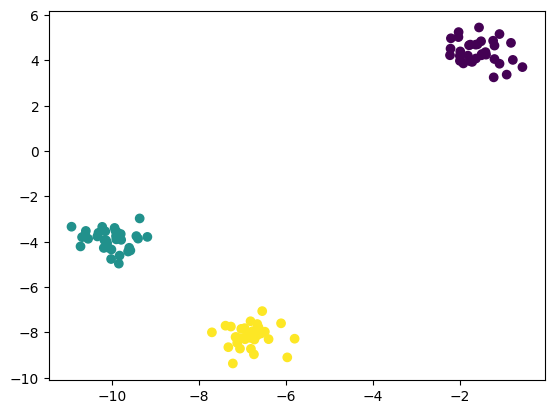

In [131]:
# View scatterplot
plt.scatter(features[:,0], features[:,1], c=target)
plt.show()

## Loading a CSV File

Use the pandas library’s read_csv to load a local or hosted CSV file into a pandas DataFrame:

In [132]:
# Load library
import pandas as pd

In [133]:
# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.csv'

In [134]:
# Load dataset
dataframe = pd.read_csv(url)

In [135]:
# View first two rows
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


There are two things to note about loading CSV files. First, it is often useful to take a quick look at the contents of the file before loading. It can be very helpful to see how a dataset is structured beforehand and what parameters we need to set to load in the file. Second, read_csv has over 30 parameters and therefore the documentation can be daunting. Fortunately, those parameters are mostly there to allow it to handle a wide variety of CSV formats.

CSV files get their names from the fact that the values are literally separated by commas (e.g., one row might be 2,"2015-01-01 00:00:00",0); however, it is common for CSV files to use other separators, such as tabs (which are referred to as TSV files). The pandas sep parameter allows us to define the delimiter used in the file. Although it is not always the case, a common formatting issue with CSV files is that the first line of the file is used to define column headers (e.g., integer, datetime, category in our solution). The header parameter allows us to specify if or where a header row exists. If a header row does not exist, we set header=None.

The read_csv function returns a pandas DataFrame: a common and useful object for working with tabular data that we’ll cover in more depth throughout this book.

## Loading an Excel File

In [140]:
# Load library
import pandas as pd

In [141]:
# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.xlsx'

In [142]:
# Load data
dataframe = pd.read_excel(url, sheet_name=0, header=0)

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

In [139]:
# View the first two rows
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


This solution is similar to our solution for reading CSV files. The main difference is the additional parameter, sheet_name, that specifies which sheet in the Excel file we wish to load. sheet_name can accept both strings, containing the name of the sheet, and integers, pointing to sheet positions (zero-indexed). If we need to load multiple sheets, we include them as a list. For example, sheet_name=[0,1,2, "Monthly Sales"] will return a dictionary of pandas DataFrames containing the first, second, and third sheets, and the sheet named Monthly Sales.

## Loading a JSON File

The pandas library provides read_json to convert a JSON file into a pandas object:

In [143]:
# Load library
import pandas as pd

In [144]:
# Create URL
url = 'https://raw.githubusercontent.com/chrisalbon/sim_data/master/data.json'

In [145]:
# Load data
dataframe = pd.read_json(url, orient='columns')

In [146]:
# View the first two rows
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


Importing JSON files into pandas is similar to the last few recipes we have seen. The key difference is the orient parameter, which indicates to pandas how the JSON file is structured. However, it might take some experimenting to figure out which argument (split, records, index, columns, or values) is the right one. Another helpful tool pandas offers is json_normalize, which can help convert semistructured JSON data into a pandas DataFrame.

## Loading a Parquet File

The pandas read_parquet function allows us to read in Parquet files:

In [147]:
# Load library
import pandas as pd

In [148]:
# Create URL
url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.parquet'

In [149]:
# Load data
dataframe = pd.read_parquet(url)

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

In [150]:
# View the first two rows
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


Parquet is a popular data storage format in the large data space. It is often used with big data tools such as Hadoop and Spark. While PySpark is outside the focus of this book, it’s highly likely companies operating on a large scale will use an efficient data storage format such as Parquet, and it’s valuable to know how to read it into a dataframe and manipulate it.

## Loading an Avro File

The use the pandavro library’s read_avro method:

In [152]:
# !pip install pandavro

                                              0.0/499.4 kB ? eta -:--:--
     -------------------                    256.0/499.4 kB 5.2 MB/s eta 0:00:01
     -------------------------------------- 499.4/499.4 kB 7.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
# Load library
import requests
import pandavro as pdx

In [154]:
# Create URL
url = 'https://machine-learning-python-cookbook.s3.amazonaws.com/data.avro'

In [155]:
# Download file
r = requests.get(url)
open('data.avro', 'wb').write(r.content)

2763

In [156]:
# Load data
dataframe = pdx.read_avro('data.avro')

In [157]:
# View the first two rows
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


Apache Avro is an open source, binary data format that relies on schemas for the data structure. At the time of writing, it is not as common as Parquet. However, large binary data formats such as Avro, thrift, and Protocol Buffers are growing in popularity due to their efficient nature. If you work with large data systems, you’re likely to run into one of these formats in the near future.

## Querying a SQLite Database

pandas’ read_sql_query allows us to make an SQL query to a database and load it:

In [159]:
# !pip install sqlalchemy

                                              0.0/2.1 MB ? eta -:--:--
     -----                                    0.3/2.1 MB 5.9 MB/s eta 0:00:01
     ---------------------------------------  2.0/2.1 MB 21.5 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 18.8 MB/s eta 0:00:00
                                              0.0/292.8 kB ? eta -:--:--
     ---------------------------------------- 292.8/292.8 kB ? eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
# Load libraries
import pandas as pd
from sqlalchemy import create_engine

In [161]:
# Create a connection to the database
database_connection = create_engine('example')

In [162]:
# Load data
dataframe = pd.read_sql_query('SELECT * FROM data', database_connection)

OperationalError: (sqlite3.OperationalError) no such table: data
[SQL: SELECT * FROM data]
(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
# View first two rows
dataframe.head(2)

SQL is the lingua franca for pulling data from databases. In this recipe we first use create_engine to define a connection to an SQL database engine called SQLite. Next we use pandas’ read_sql_query to query that database using SQL and put the results in a DataFrame.

SQL is a language in its own right and, while beyond the scope of this book, it is certainly worth knowing for anyone wanting to learn about machine learning. Our SQL query, SELECT * FROM data, asks the database to give us all columns (*) from the table called data.

Note that this is one of a few recipes in this book that will not run without extra code. Specifically, create_engine('sqlite:///sample.db') assumes that an SQLite database already exists.

## Querying a Remote SQL Database

Create a connection with pymysql and read it into a dataframe with pandas:

In [164]:
# !pip install pymysql

                                              0.0/44.8 kB ? eta -:--:--
     ---------------------------------------- 44.8/44.8 kB 2.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [165]:
# Import libraries
import pymysql
import pandas as pd

In [166]:
# Create a DB connection
# Use the following example to start a DB instance
# https://github.com/kylegallatin/mysql-db-example
conn = pymysql.connect(
    host='localhost',
    user='root',
    password = "",
    db='db',
)

OperationalError: (2003, "Can't connect to MySQL server on 'localhost' ([WinError 10061] No connection could be made because the target machine actively refused it)")

In [ ]:
# Read the SQL query into a dataframe
dataframe = pd.read_sql("select * from data", conn)

In [167]:
# View the first two rows
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 00:00:00,0
1,5,2015-01-01 00:00:01,0


Of all of the recipes presented in this chapter, this is probably the one we will use most in the real world. While connecting and reading from an example sqlite database is useful, it’s likely not representative of tables you’ll need to connect to in an enterprise environment. Most SQL instances that you’ll connect to will require you to connect to the host and port of a remote machine, specifying a username and password for authentication. This example requires you to start a running SQL instance locally that mimics a remote server on localhost so that you can get a sense of the workflow.

## Loading Data from a Google Sheet

Use pandas read_CSV and pass a URL that exports the Google Sheet as a CSV:

In [168]:
# Import libraries
import pandas as pd

In [169]:
# Google Sheet URL that downloads the sheet as a CSV
url = "https://docs.google.com/spreadsheets/d/"\
      "1ehC-9otcAuitqnmWksqt1mOrTRCL38dv0K9UjhwzTOA/export?format=csv"

In [170]:
# Read the CSV into a dataframe
dataframe = pd.read_csv(url)

In [171]:
# View the first two rows
dataframe.head(2)

,integer,datetime,category
0,5,2015-01-01 0:00:00,0
1,5,2015-01-01 0:00:01,0


While Google Sheets can easily be downloaded, it’s sometimes helpful to be able to read them directly into Python without any intermediate steps. The /export?format=csv query parameter at the end of the URL above creates an endpoint from which we can either download the file or read it into pandas.

## Loading Data from an S3 Bucket

Add storage options to pandas giving it access to the S3 object:

In [172]:
# Import libraries
import pandas as pd

In [173]:
# S3 path to CSV
s3_uri = "s3://machine-learning-python-cookbook/data.csv"

In [174]:
# Set AWS credentials (replace with your own)
ACCESS_KEY_ID = "xxxxxxxxxxxxx"
SECRET_ACCESS_KEY = "xxxxxxxxxxxxxxxx"

In [175]:
# Read the CSV into a dataframe
dataframe = pd.read_csv(s3_uri,storage_options={
        "key": ACCESS_KEY_ID,
        "secret": SECRET_ACCESS_KEY,
  }
)

ImportError: Missing optional dependency 'fsspec'.  Use pip or conda to install fsspec.

In [ ]:
# View first two rows
dataframe.head(2)

Many enterprises now keep data in cloud provider blob stores such as Amazon S3 or Google Cloud Storage (GCS). It’s common for machine learning practitioners to connect to these sources to retrieve data. Although the S3 URI (s3://machine-learning-python-cookbook/data.csv) is public, it still requires you to provide your own AWS access credentials to access it. 

## Loading Unstructured Data

Use the base Python open function to load the information:

In [176]:
# Import libraries
import requests

In [177]:
# URL to download the txt file from
txt_url = "https://machine-learning-python-cookbook.s3.amazonaws.com/text.txt"

In [178]:
# Get the txt file
r = requests.get(txt_url)

In [179]:
# Write it to text.txt locally
with open('text.txt', 'wb') as f:
    f.write(r.content)

In [180]:
# Read in the file
with open('text.txt', 'r') as f:
    text = f.read()

In [181]:
# Print the content
print(text)

Hello there!


While structured data can easily be read in from CSV, JSON, or various databases, unstructured data can be more challenging and may require custom processing down the line. Sometimes it’s helpful to open and read in files using Python’s basic open function. This allows us to open files and then read the content of that file.

# Data Wrangling